# Esercizio 3

Per ognuna delle seguenti funzioni:

f (x) = x exp(x) x ∈ [−1, 1]

f (x) = 1/1 + 25 ∗ x x ∈ [−1, 1]

f (x) = sin(5x) + 3x x ∈ [1, 5]

Assegnati m punti equispaziati, con m fissato,

i. Per ciascun valore di n ∈ {1, 2, 3, 5, 7}, creare una figura con il grafico della funzione esatta f (x) insieme a quello del polinomio di approssimazione
p(x). Evidenziare gli m punti noti.

ii. Per ciascun valore di n ∈ {1, 2, 3, 5, 7}, riportare il valore dell’errore commesso nel punto x = 0.

iii. Calcolare la norma 2 dell’errore di approssimazione, commesso sugli m
nodi, per ciascun valore di n ∈ {1, 5, 7}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

m= 100 #Assegnati m punti equispaziati, con m fissato,

In [2]:
def p(alpha, x):
# Funzione per valutare il polinomio p, in un punto x, dati i coefficienti alpha
    A = np.zeros((len(x), len(alpha)))
    for i in range(len(alpha)):
        A[:,i] = np.power(x, i)
    y = np.dot(A,alpha)
    return y


In [3]:
def polinomio_approssimante(degree, size, x_plot, y_plot):
    '''calcola tramite Equazioni Normali polinomio approssimante'''
    #matrice A
    A = np.zeros((size, degree+1))
    for i in range(degree+1):
        A[:,i] = np.power(x_plot, i)
    
    ''' Risoluzione tramite equazioni normali'''
    # calcoliamo la matrice del sistema e il termine noto a parte
    ATA = A.T @ A
    ATy = A.T @ y_plot
    # decomposizione di Choleski
    L = scipy.linalg.cholesky(ATA, lower=True)
    alpha1 = scipy.linalg.solve(L, ATy, lower=True) # L y = b
    alpha_normali  = scipy.linalg.solve(L.T, alpha1, lower=False) # L.T my_x = y
    return alpha_normali
    

In [4]:
def test (funzione, start, stop):
    '''esegue il test per ogni funzione'''
    #x, y della funzione esatta
    x_plot = np.linspace(start, stop, m)
    y_plot = funzione(x_plot)
    #creare una figura con il grafico della funzione esatta f(x) ...
    plt.figure(figsize=(30,20))
    plt.plot(x_plot, y_plot,'black',marker='*', label='function')
    #Per ciascun valore di n ∈ {1, 2, 3, 5, 7}   (n è il grado di approssimazione del polinomio)
    for n, color in [(1, 'red'), (2, 'green'), (3, 'blue'), (5, 'cyan'), (7, 'magenta')]:
        #polinomio approssimante
        alpha = polinomio_approssimante(n, m, x_plot, y_plot)
        y_polinomio = p(alpha, x_plot)
        plt.plot(x_plot, y_polinomio, color, marker='o', label = f'polinomio grado {n}')
        #err in x=0
        err = funzione(0) - p(alpha, np.array([0]))
        print(f'grado {n}, err {err}')
        # norma 2 dell’errore di approssimazione,commesso sugli m nodi, per ciascun valore di n ∈ {1, 5, 7}
        for grado in [1, 5, 7]:
            if n == grado:
                norma = np.linalg.norm(y_plot - y_polinomio)
                print(f'grado {n} norma {norma}')
        plt.legend()
    plt.show()

grado 1, err [-0.37604418]
grado 1 norma 3.609005765816446
grado 2, err [0.01571815]
grado 3, err [0.01571815]
grado 5, err [-0.00019853]
grado 5 norma 0.0017769145746573747
grado 7, err [1.19490433e-06]
grado 7 norma 1.0637535090434313e-05


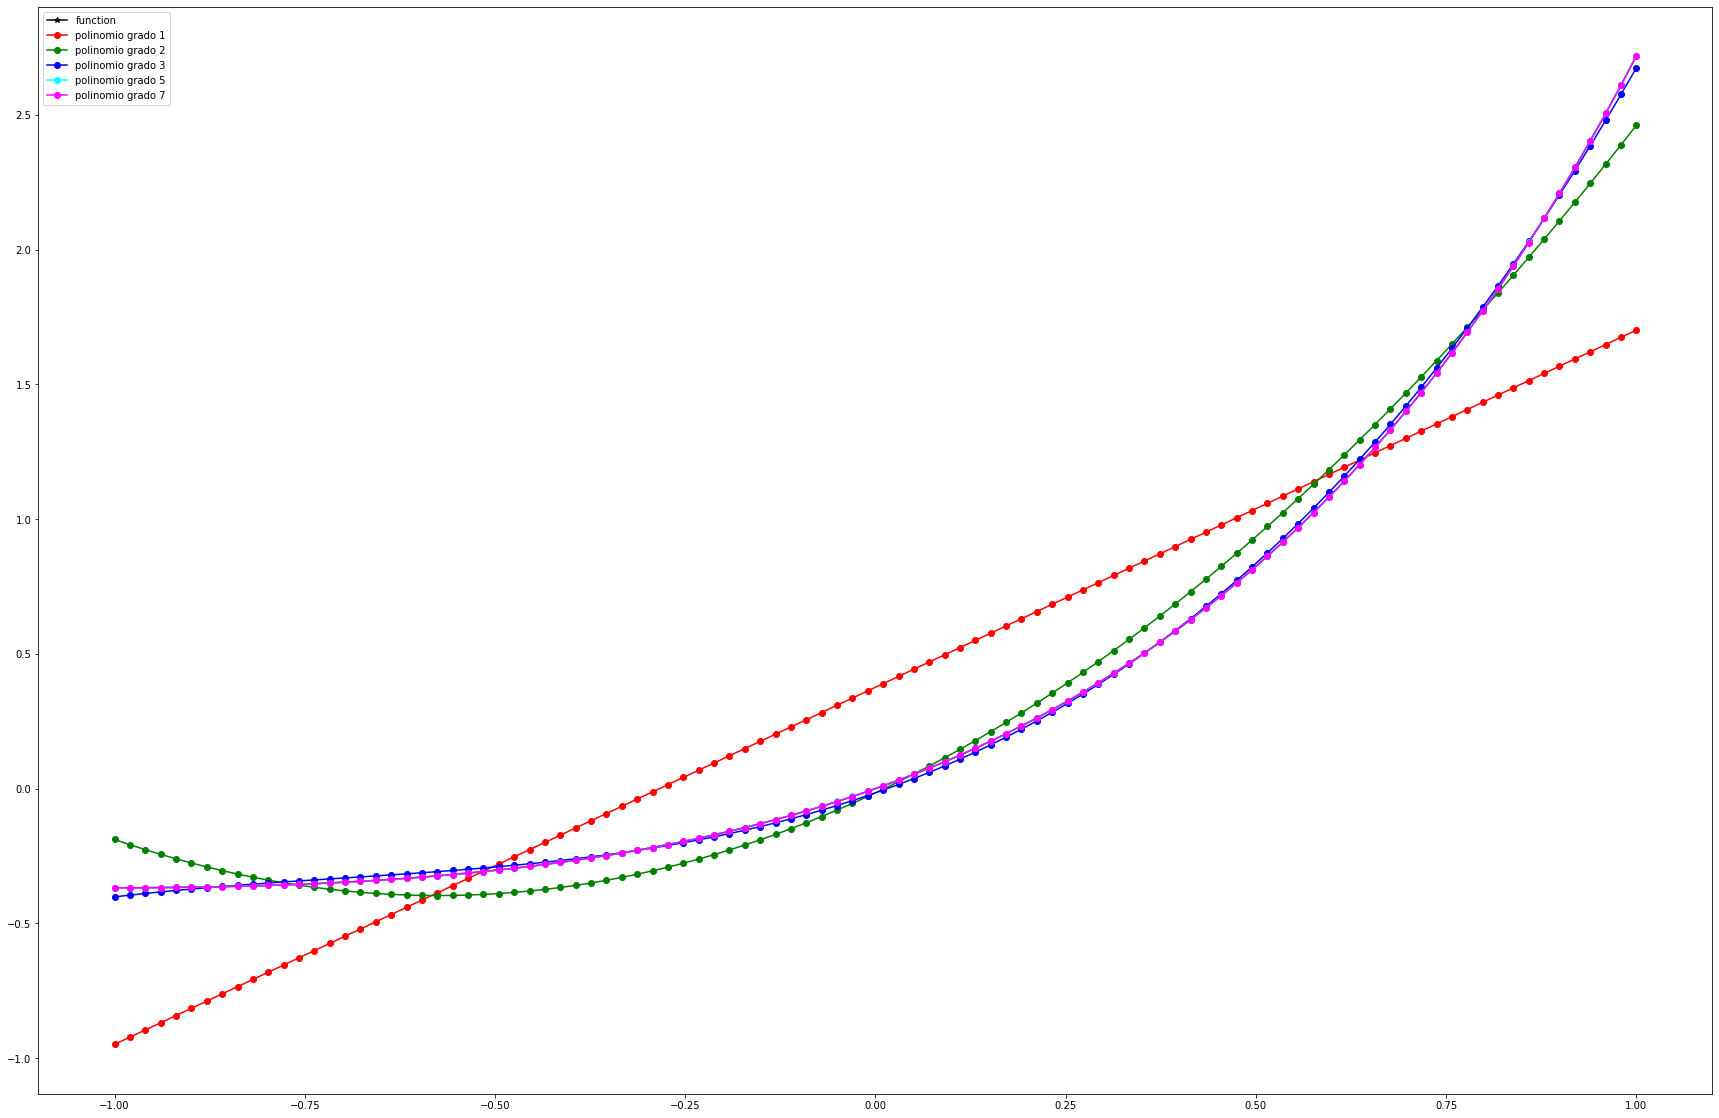

grado 1, err [0.99451756]
grado 1 norma 6.182276284476907
grado 2, err [0.98181175]
grado 3, err [0.98181175]
grado 5, err [0.96286605]
grado 5 norma 6.103535691202584
grado 7, err [0.93782147]
grado 7 norma 6.063851023576519


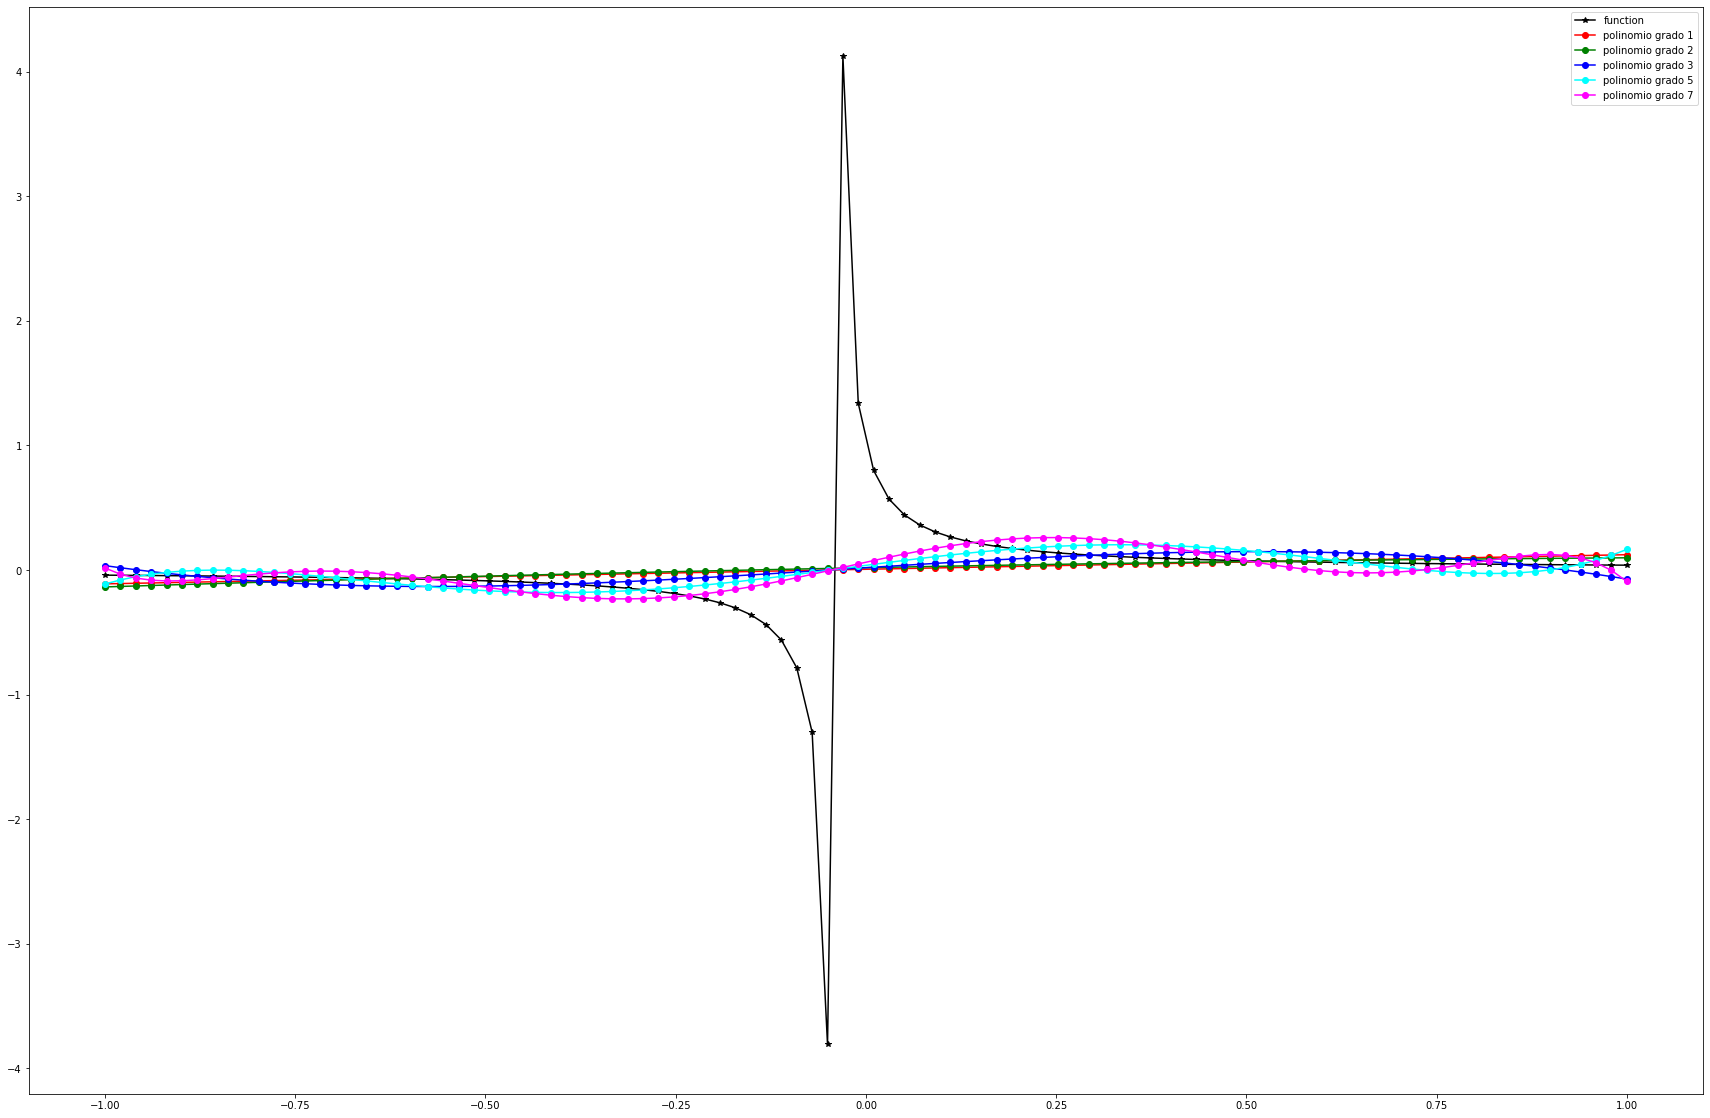

grado 1, err [-0.20070669]
grado 1 norma 6.970187630129213
grado 2, err [0.55871534]
grado 3, err [-0.39910424]
grado 5, err [23.95864781]
grado 5 norma 6.337721584731216
grado 7, err [266.62724813]
grado 7 norma 5.397321273124068


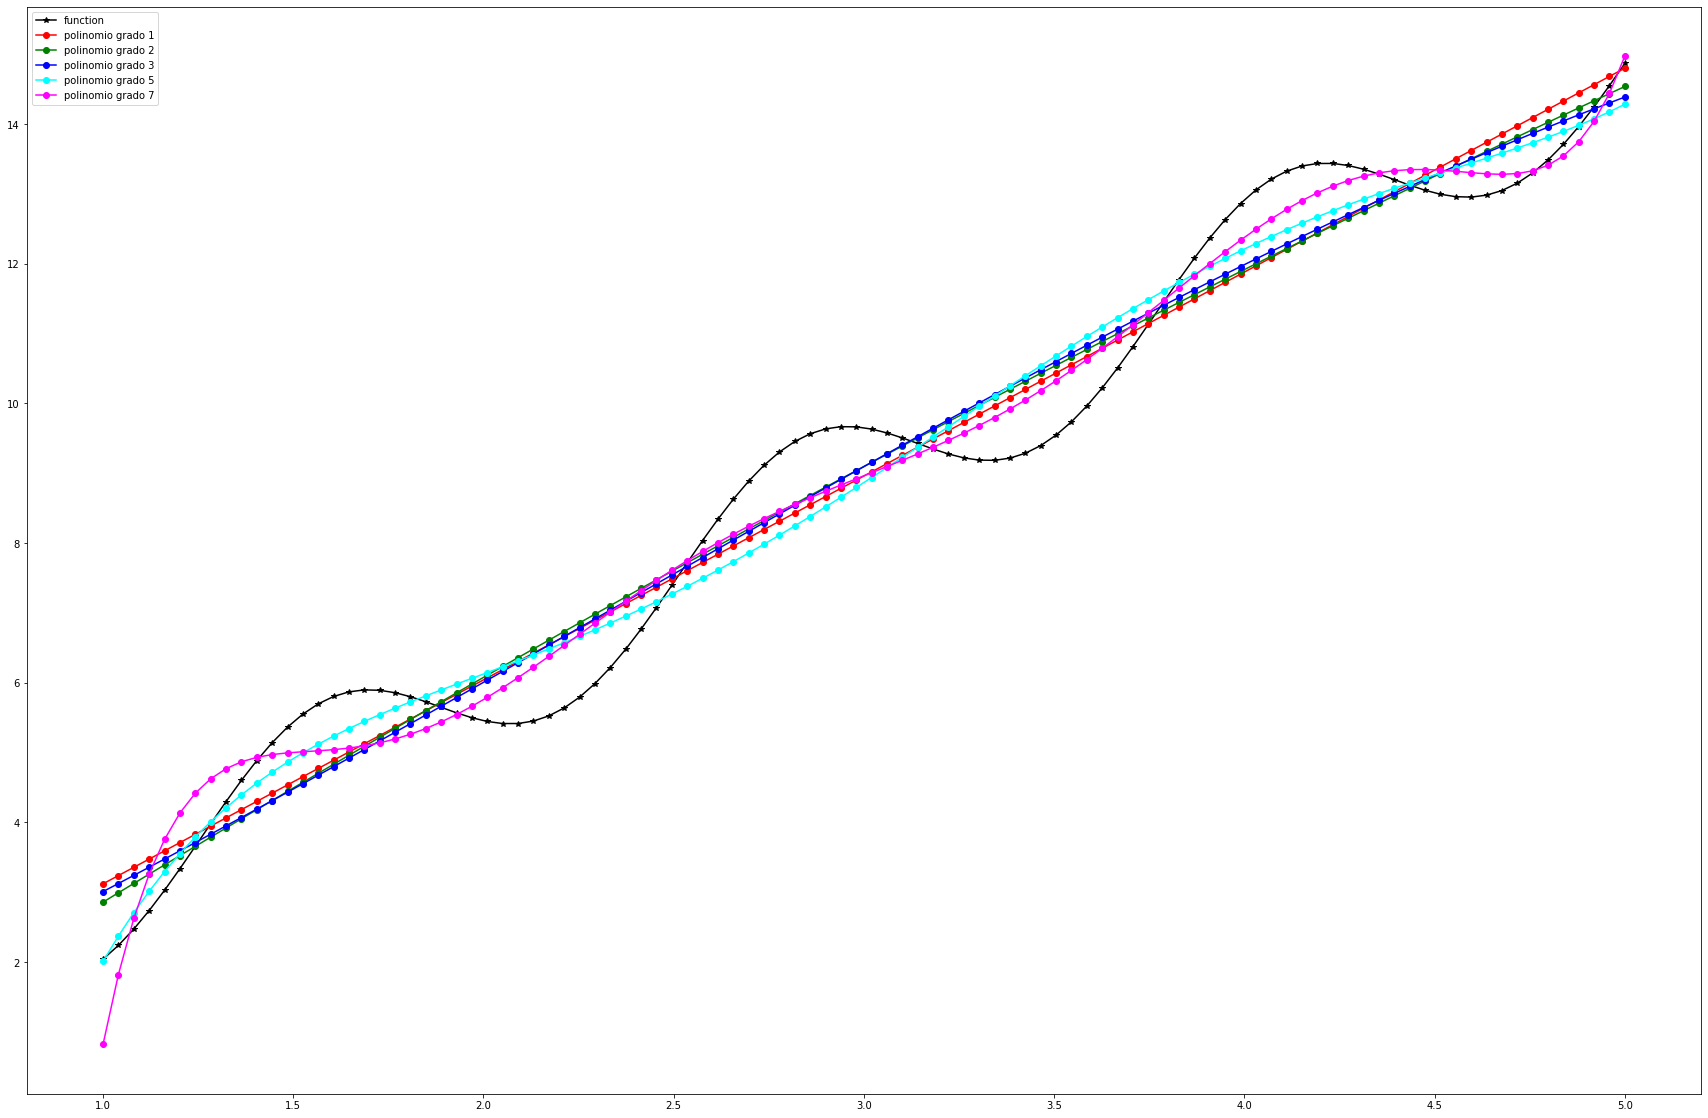

In [5]:
f1 = lambda x: x*np.exp(x)
test(f1, -1, 1)
f2 = lambda x: 1 / (1 + 25 * x)
test(f2, -1, 1)
f3 = lambda x: np.sin(5*x) + 3*x
test(f3, 1, 5)